In [3]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import cross_validation
import matplotlib.pyplot as plt

In [6]:
def load_data():
    digits = datasets.load_digits()
    return cross_validation.train_test_split(digits.data,digits.target,test_size=0.25,random_state=0, stratify=digits.target)

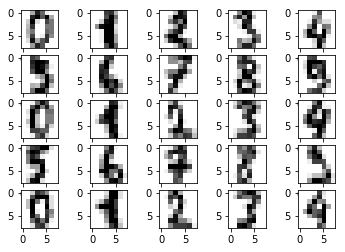

In [5]:
# 显示Digit数据
def show_digits():
    digits = datasets.load_digits()
    fig = plt.figure()
    #print('images 0 :',digits.data[0])
    for i in range(25):
        ax = fig.add_subplot(5,5,i+1)
        #print(digits.images[i])
        ax.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

show_digits()

In [7]:
# 检验【切分质量评价准则】criterion对拟合的影响
# 测试分类决策树函数：
def test_DTC_Criterion(*data):
    X_train,X_test,Y_train,Y_test = data
    
    criterions = ['gini','entropy']
    for criterion in criterions :
            regr = DecisionTreeClassifier(criterion=criterion)
            regr.fit(X_train,Y_train)
            print(criterion)
            print('【训练集成绩】Training Score:{0}'.format(regr.score(X_train,Y_train)))
            print('【测试集成绩】Testing  Score:{0}'.format(regr.score(X_test,Y_test)))

In [8]:
# 开始测试：
X_train,X_test,Y_train,Y_test = load_data()
test_DTC_Criterion(X_train,X_test,Y_train,Y_test)

gini
【训练集成绩】Training Score:1.0
【测试集成绩】Testing  Score:0.8577777777777778
entropy
【训练集成绩】Training Score:1.0
【测试集成绩】Testing  Score:0.8555555555555555


In [9]:
# 检验【随机划分】与【最优划分】的影响
# 测试分类决策树函数：
def test_DTC_splitter(*data):
    X_train,X_test,Y_train,Y_test = data
    
    splitters = ['best','random']
    
    for splitter in splitters :
            regr = DecisionTreeClassifier(splitter=splitter)
            regr.fit(X_train,Y_train)
            print(splitter)
            print('【训练集成绩】Training Score:{0}'.format(regr.score(X_train,Y_train)))
            print('【测试集成绩】Testing  Score:{0}'.format(regr.score(X_test,Y_test)))

In [12]:
# 开始测试：
X_train,X_test,Y_train,Y_test = load_data()
test_DTC_splitter(X_train,X_test,Y_train,Y_test)

best
【训练集成绩】Training Score:1.0
【测试集成绩】Testing  Score:0.8466666666666667
random
【训练集成绩】Training Score:1.0
【测试集成绩】Testing  Score:0.8466666666666667


In [13]:
# 检验决策树深度对拟合的影响：
# 测试分类决策树函数：
def test_DTC_depth(*data,maxdepth):
    X_train,X_test,Y_train,Y_test = data
    
    depths = np.arange(1,maxdepth)
    
    train_score = []
    test_score = []
    
    for depth in depths :
            regr = DecisionTreeClassifier(max_depth=depth)
            regr.fit(X_train,Y_train)
            train_score.append(regr.score(X_train,Y_train))
            test_score.append(regr.score(X_test,Y_test))
    # 绘图：
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(depths,train_score,label='Training Score', marker='o')
    ax.plot(depths,test_score, label='Testing Score',marker='*')
    ax.set_xlabel(r'maxdepth')
    ax.set_ylabel('score')
    ax.set_title('DecisionTreeClassifier')
    ax.legend(framealpha=0.5, loc='best')
    plt.show()

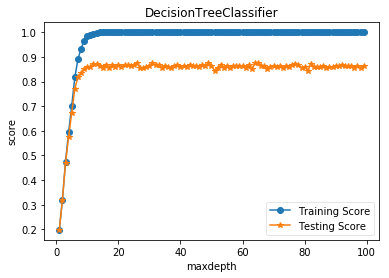

In [14]:
# 开始测试：
X_train,X_test,Y_train,Y_test = load_data()
test_DTC_depth(X_train,X_test,Y_train,Y_test,maxdepth=100)